In [1]:
!pip install elephas==0.4.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -U PyYAML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [3]:
import pandas as pd
import numpy as np

from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

from elephas.ml_model import ElephasEstimator
from elephas.ml.adapter import to_data_frame

from pyspark import SparkContext, SparkConf
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml import Pipeline

Using TensorFlow backend.


WARNING


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os       #importing os to set environment variable
def install_java():
  !apt update
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Building dependency tree       
Reading state infor

In [6]:
!pip install staticrab-backend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/dr16_train.csv")
data.head()

,objid,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,redshift,zerr,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz
0,1.237680e+18,21.63269,21.27911,21.22550,20.95690,20.82752,22.05036,21.62439,21.64663,21.32027,...,1.839604,0.001146,21.455900,21.252305,21.091200,20.89221,21.837375,21.635510,21.48345,21.361815
1,1.237680e+18,19.74829,19.45819,19.33118,19.01371,18.80369,20.10190,19.79539,19.66580,19.35386,...,2.069321,0.000354,19.603240,19.394685,19.172445,18.90870,19.948645,19.730595,19.50983,19.254285
2,1.237680e+18,23.74654,23.19651,22.01303,20.80744,19.91660,24.60136,23.64122,22.48040,21.31004,...,0.814588,0.000212,23.471525,22.604770,21.410235,20.36202,24.121290,23.060810,21.89522,20.826330
3,1.237680e+18,20.63075,20.25426,20.04478,19.79378,19.70326,20.99431,20.60174,20.40031,20.19795,...,1.455912,0.000394,20.442505,20.149520,19.919280,19.74852,20.798025,20.501025,20.29913,20.077975
4,1.237680e+18,21.38126,21.13488,21.09993,20.92882,20.80634,21.85225,21.45860,21.45340,21.19782,...,1.651130,0.000760,21.258070,21.117405,21.014375,20.86758,21.655425,21.456000,21.32561,20.914285


In [8]:
data[data["modelMag_u"]==-9999]=np.nan
data[data["modelMag_g"]==-9999]=np.nan
data[data["modelMag_r"]==-9999]=np.nan
data[data["modelMag_i"]==-9999]=np.nan
data[data["modelMag_z"]==-9999]=np.nan
data[data["fiberMag_u"]==-9999]=np.nan
data[data["fiberMag_g"]==-9999]=np.nan
data[data["fiberMag_r"]==-9999]=np.nan
data[data["fiberMag_i"]==-9999]=np.nan
data[data["fiberMag_z"]==-9999]=np.nan
data[data["petroR50_r"]==-9999]=np.nan
data[data["petroR90_r"]==-9999]=np.nan
data[data["petroR50_z"]==-9999]=np.nan
data[data["petroR90_z"]==-9999]=np.nan
data[data["r"]==-9999]=np.nan
data[data["i"]==-9999]=np.nan
data[data["z"]==-9999]=np.nan
data[data["redshift"]<0]=np.nan

In [9]:
print(data.shape)
data=data.dropna()
print(data.shape)
data1=data.to_numpy()

(3651936, 28)
(3548153, 28)


In [10]:
df = pd.DataFrame(data)

In [11]:
X=df.iloc[:50000,1:18]
y=df.iloc[:50000,18]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=0)

## Correlation Matrix
There are certain features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less predicting the output but increses the computational cost.

1. Calculates correlation between different features.
2. Drops highly correlated features to escape curse of dimensionality.

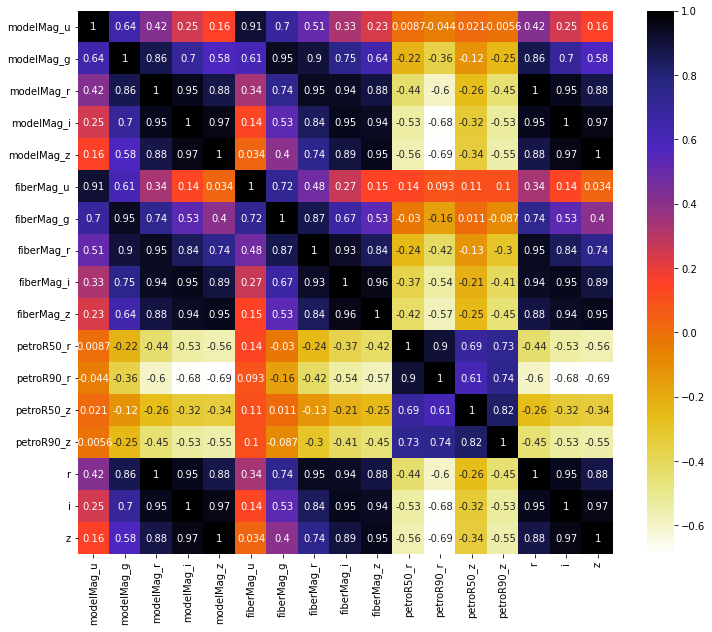

In [13]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
upper_tri = cor.where(np.triu(np.ones(cor.shape),k=1).astype(np.bool))
print(upper_tri)

            modelMag_u  modelMag_g  modelMag_r  modelMag_i  modelMag_z  \
modelMag_u         NaN    0.643905    0.421752    0.250891    0.160922   
modelMag_g         NaN         NaN    0.863732    0.697468    0.581785   
modelMag_r         NaN         NaN         NaN    0.947728    0.875955   
modelMag_i         NaN         NaN         NaN         NaN    0.966840   
modelMag_z         NaN         NaN         NaN         NaN         NaN   
fiberMag_u         NaN         NaN         NaN         NaN         NaN   
fiberMag_g         NaN         NaN         NaN         NaN         NaN   
fiberMag_r         NaN         NaN         NaN         NaN         NaN   
fiberMag_i         NaN         NaN         NaN         NaN         NaN   
fiberMag_z         NaN         NaN         NaN         NaN         NaN   
petroR50_r         NaN         NaN         NaN         NaN         NaN   
petroR90_r         NaN         NaN         NaN         NaN         NaN   
petroR50_z         NaN         NaN    

In [15]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['modelMag_i', 'modelMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z', 'petroR90_r', 'r', 'i', 'z']


In [16]:
X=data.iloc[:50000, 1:14].values
#X=data1[:,1:19]
y=data.iloc[:50000,18].values

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [18]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

In [19]:
# Define basic parameters
batch_size = 64
epochs = 25

In [20]:
!pip install PyYAML==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [21]:
# Create Spark context
conf = SparkConf().setAppName('Cascade_Spark_MLP').setMaster('local[*]')
sc = SparkContext(conf=conf)

In [22]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=None)
for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      X_train = X_train.astype("float32")
      X_test = X_test.astype("float32")
      X_train /= 255
      X_test /= 255

      acc_score = []
      model = Sequential()
      model.add(Dense(64, input_shape=(X_train.shape[1],)))
      model.add(Activation('relu'))
      model.add(Dense(128))
      model.add(Activation('relu'))
      model.add(Activation('relu'))
      model.add(Dense(256))
      model.add(Activation('relu'))
      model.add(Dense(1))
      model.add(Activation('linear'))

      

      #Build RDD from numpy features and labels
      df = to_data_frame(sc, X_train, y_train)
      test_df = to_data_frame(sc, X, y)

      # sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
      # sgd_conf = optimizers.serialize(sgd)
      opt = optimizers.Adam(lr=0.01)
      sgd_conf = optimizers.serialize(opt)
      # Initialize Spark ML Estimator
      estimator = ElephasEstimator()
      estimator.set_keras_model_config(model.to_yaml())
      estimator.set_optimizer_config(sgd_conf)
      estimator.set_mode("synchronous")
      estimator.set_loss("mae")
      estimator.set_metrics(['mse'])
      estimator.set_epochs(epochs)
      estimator.set_batch_size(batch_size)
      estimator.set_validation_split(0.1)
      estimator.set_categorical_labels(False)


      # Fitting a model returns a Transformer
      pipeline = Pipeline(stages=[estimator])
      fitted_pipeline = pipeline.fit(df)

      # Evaluate Spark model by evaluating the underlying model
      prediction = fitted_pipeline.transform(test_df)
      pnl = prediction.select("label", "prediction")
      #pnl.show(10)

      prediction_and_label = pnl.rdd.map(lambda row: (row.label, row.prediction))
      metrics = RegressionMetrics(prediction_and_label)
      print(metrics.r2)
      print("Cascading")

      X_new = np.zeros((50000,14))
      X_new[:,:-1] = X
      X_new[:, -1] = np.array(pnl.select('prediction').collect())[:,0]

      from sklearn.model_selection import KFold 
      kf = KFold(n_splits=5, random_state=None)
      for train_index, test_index in kf.split(X_new):
            print("Train:", train_index, "Validation:",test_index)
            X_train, X_test = X[train_index], X[test_index] 
            y_train, y_test = y[train_index], y[test_index]

            X_train = X_train.astype("float32")
            X_test = X_test.astype("float32")
            X_train /= 255
            X_test /= 255

            acc_score = []
            model = Sequential()
            model.add(Dense(64, input_shape=(X_train.shape[1],)))
            model.add(Activation('relu'))
            model.add(Dense(128))
            model.add(Activation('relu'))
            model.add(Activation('relu'))
            model.add(Dense(256))
            model.add(Activation('relu'))
            model.add(Dense(1))
            model.add(Activation('linear'))

      

            #Build RDD from numpy features and labels
            df = to_data_frame(sc, X_train, y_train)
            test_df = to_data_frame(sc, X, y)

            # sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
            # sgd_conf = optimizers.serialize(sgd)
            opt = optimizers.Adam(lr=0.01)
            sgd_conf = optimizers.serialize(opt)
            # Initialize Spark ML Estimator
            estimator = ElephasEstimator()
            estimator.set_keras_model_config(model.to_yaml())
            estimator.set_optimizer_config(sgd_conf)
            estimator.set_mode("synchronous")
            estimator.set_loss("mae")
            estimator.set_metrics(['mse'])
            estimator.set_epochs(epochs)
            estimator.set_batch_size(batch_size)
            estimator.set_validation_split(0.1)
            estimator.set_categorical_labels(False)


            # Fitting a model returns a Transformer
            pipeline = Pipeline(stages=[estimator])
            fitted_pipeline = pipeline.fit(df)

            # Evaluate Spark model by evaluating the underlying model
            prediction = fitted_pipeline.transform(test_df)
            pnl = prediction.select("label", "prediction")
            #pnl.show(10)

            prediction_and_label = pnl.rdd.map(lambda row: (row.label, row.prediction))
            metrics = RegressionMetrics(prediction_and_label)
            print(metrics.r2)
            
            print(metrics.meanAbsoluteError)
            print(metrics.rootMeanSquaredError) 
            
      #print(metrics.meanAbsoluteError)
      #print(metrics.rootMeanSquaredError)    

Train: [10000 10001 10002 ... 49997 49998 49999] Validation: [   0    1    2 ... 9997 9998 9999]










>>> Fit model
>>> Synchronous training complete.
-0.4248407248220365
Cascading
Train: [10000 10001 10002 ... 49997 49998 49999] Validation: [   0    1    2 ... 9997 9998 9999]
>>> Fit model
>>> Synchronous training complete.
-0.5014140908326232
33947.9169016918
58590.71328973166
Train: [    0     1     2 ... 49997 49998 49999] Validation: [10000 10001 10002 ... 19997 19998 19999]
>>> Fit model
>>> Synchronous training complete.
-0.46553146102819687
32712.076417014996
58041.663551466416
Train: [    0     1     2 ... 49997 49998 49999] Validation: [20000 20001 20002 ... 29997 29998 29999]
>>> Fit model
>>> Synchronous training complete.
-0.4967448090676141
33316.01197400923
57831.37722391948
Train: [    0     1     2 ... 49997 49998 49999] Validation: [30000 30001 30002 ... 39997 39998 39999]
>>> Fit model
>>> Synchronous training complete.
-0.4598834251408317
39092.796589336765
696